In [249]:
# For Treating Data 

import pandas as pd
import numpy as np

# For graphics 
import seaborn as sns
import matplotlib.pyplot as plt


### MLearning ###

#Preprocessing

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Split Dataset ##

from sklearn.model_selection import train_test_split

## Models ##

#LogisticRegression
from sklearn.linear_model import LogisticRegression

#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Suport Vector Machine
from sklearn.svm import SVC



#For Curse of Dimensions

from sklearn.decomposition import PCA


# Evaluation Metrics 

from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score

from sklearn.model_selection import cross_validate , cross_val_score

from sklearn.metrics import multilabel_confusion_matrix

#Cross validation 

from sklearn.model_selection import cross_validate , cross_val_score

In [250]:
shel = pd.read_csv('data_for_model',index_col=0)
shel.head()

,AnimalType,Spayed/Neutered,Age_Months,OutcomeType,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
0,1,1,12.00,Return_to_owner,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,12.00,Died,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,24.00,Adoption,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0.69,Transfer,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,24.00,Transfer,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Make the Feature we want to predict From Categorical to Numerical

For Classification Supervised. ONLY FOR THE y (what you wnat to predict) 

In [251]:

# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
shel['OutcomeType'] = le.fit_transform(shel['OutcomeType'])

#Method : inverse_transform(self, y)
#What it does: Transform labels back to original encoding.


In [252]:
# Return to the in
shel['outcomeType_cat'] = le.inverse_transform(shel['OutcomeType'])

In [253]:
shel['outcomeType_cat'].value_counts()

Adoption           10769
Transfer            9406
Return_to_owner     4785
Died                1750
Name: outcomeType_cat, dtype: int64

In [254]:
shel['OutcomeType'].value_counts()

0    10769
3     9406
2     4785
1     1750
Name: OutcomeType, dtype: int64

In [255]:
# Drop the colum outcomeType_cat

shel.drop(columns = ['outcomeType_cat'], inplace = True )

In [256]:
shel

,AnimalType,Spayed/Neutered,Age_Months,OutcomeType,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
0,1,1,12.00,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,12.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,24.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0.69,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,24.00,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26705,0,0,1.00,3,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
26706,0,1,3.00,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26707,1,1,48.00,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
26708,0,0,0.92,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# look at co-Colinearity 


In [257]:
shel.describe()

,AnimalType,Spayed/Neutered,Age_Months,OutcomeType,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
count,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,...,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000,26710.000000
mean,0.583789,0.696294,26.124493,1.480270,0.066118,0.019431,0.031411,0.329240,0.021528,0.051030,...,0.004568,0.113478,0.014863,0.023100,0.034145,0.456496,0.010333,0.461363,0.497866,0.040771
std,0.492939,0.459866,35.588297,1.326781,0.248492,0.138037,0.174430,0.469946,0.145137,0.220062,...,0.067431,0.317890,0.121008,0.150224,0.181604,0.499014,0.101497,0.498514,0.500005,0.197764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,36.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,240.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [258]:
#Correlation

correlation = shel.corr()

#Remove from the correlation matrix in columns the feature we want to predict
correlation_no_targ = correlation.drop(columns = 'OutcomeType')
#Remove from the correlation matrix in index the feature we want to predict
correlation_no_targ = correlation_no_targ.drop(index = 'OutcomeType')

correlation_no_targ

,AnimalType,Spayed/Neutered,Age_Months,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,Pit Bull Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
AnimalType,1.000000,0.274949,0.232324,0.224668,-0.166717,-0.213278,-0.829743,0.125242,0.195800,0.234061,...,0.004255,0.300943,-0.145473,-0.182117,0.157084,0.170756,0.085216,0.001671,0.083211,-0.214594
Spayed/Neutered,0.274949,1.000000,0.184265,0.043362,-0.019686,-0.037896,-0.261810,0.031207,0.061767,0.007864,...,0.010930,0.090289,-0.039984,-0.027431,0.047513,0.066093,0.028735,0.038964,0.084621,-0.312166
Age_Months,0.232324,0.184265,1.000000,0.065247,0.030950,-0.043033,-0.238097,0.008825,0.031882,0.011178,...,0.024854,0.066657,-0.036975,-0.028828,0.040408,0.012157,0.034388,0.014666,0.028844,-0.109895
Chihuahua Shorthair Mix,0.224668,0.043362,0.065247,1.000000,-0.037456,-0.047917,-0.186417,-0.039467,-0.061702,-0.073759,...,-0.018024,0.200300,-0.032683,-0.040916,0.039576,-0.009110,0.010023,-0.002347,0.021024,-0.047238
Domestic Longhair Mix,-0.166717,-0.019686,0.030950,-0.037456,1.000000,-0.025350,-0.098623,-0.020880,-0.032643,-0.039022,...,0.006554,-0.050252,0.020814,0.034326,-0.024974,-0.009741,-0.011659,0.010094,-0.014860,0.012124
Domestic Medium Hair Mix,-0.213278,-0.037896,-0.043033,-0.047917,-0.025350,1.000000,-0.126167,-0.026711,-0.041760,-0.049920,...,0.000534,-0.064286,0.036416,0.042321,-0.033859,-0.019786,-0.018334,0.011159,-0.016188,0.012800
Domestic Shorthair Mix,-0.829743,-0.261810,-0.238097,-0.186417,-0.098623,-0.126167,1.000000,-0.103919,-0.162464,-0.194211,...,-0.007287,-0.249851,0.134503,0.152133,-0.130412,-0.129707,-0.071328,-0.014419,-0.071899,0.218129
German Shepherd Mix,0.125242,0.031207,0.008825,-0.039467,-0.020880,-0.026711,-0.103919,1.000000,-0.034396,-0.041117,...,-0.010048,0.091496,-0.018219,-0.022809,0.003362,-0.102607,-0.012560,0.004510,0.006566,-0.027971
Labrador Retriever Mix,0.195800,0.061767,0.031882,-0.061702,-0.032643,-0.041760,-0.162464,-0.034396,1.000000,-0.064281,...,-0.015708,-0.014809,-0.028484,-0.035659,-0.030484,-0.012343,0.192629,0.004492,0.008306,-0.032323
Pit Bull Mix,0.234061,0.007864,0.011178,-0.073759,-0.039022,-0.049920,-0.194211,-0.041117,-0.064281,1.000000,...,-0.018777,-0.002877,-0.034049,-0.042627,-0.034501,0.206619,-0.011027,0.008648,0.012237,-0.052737


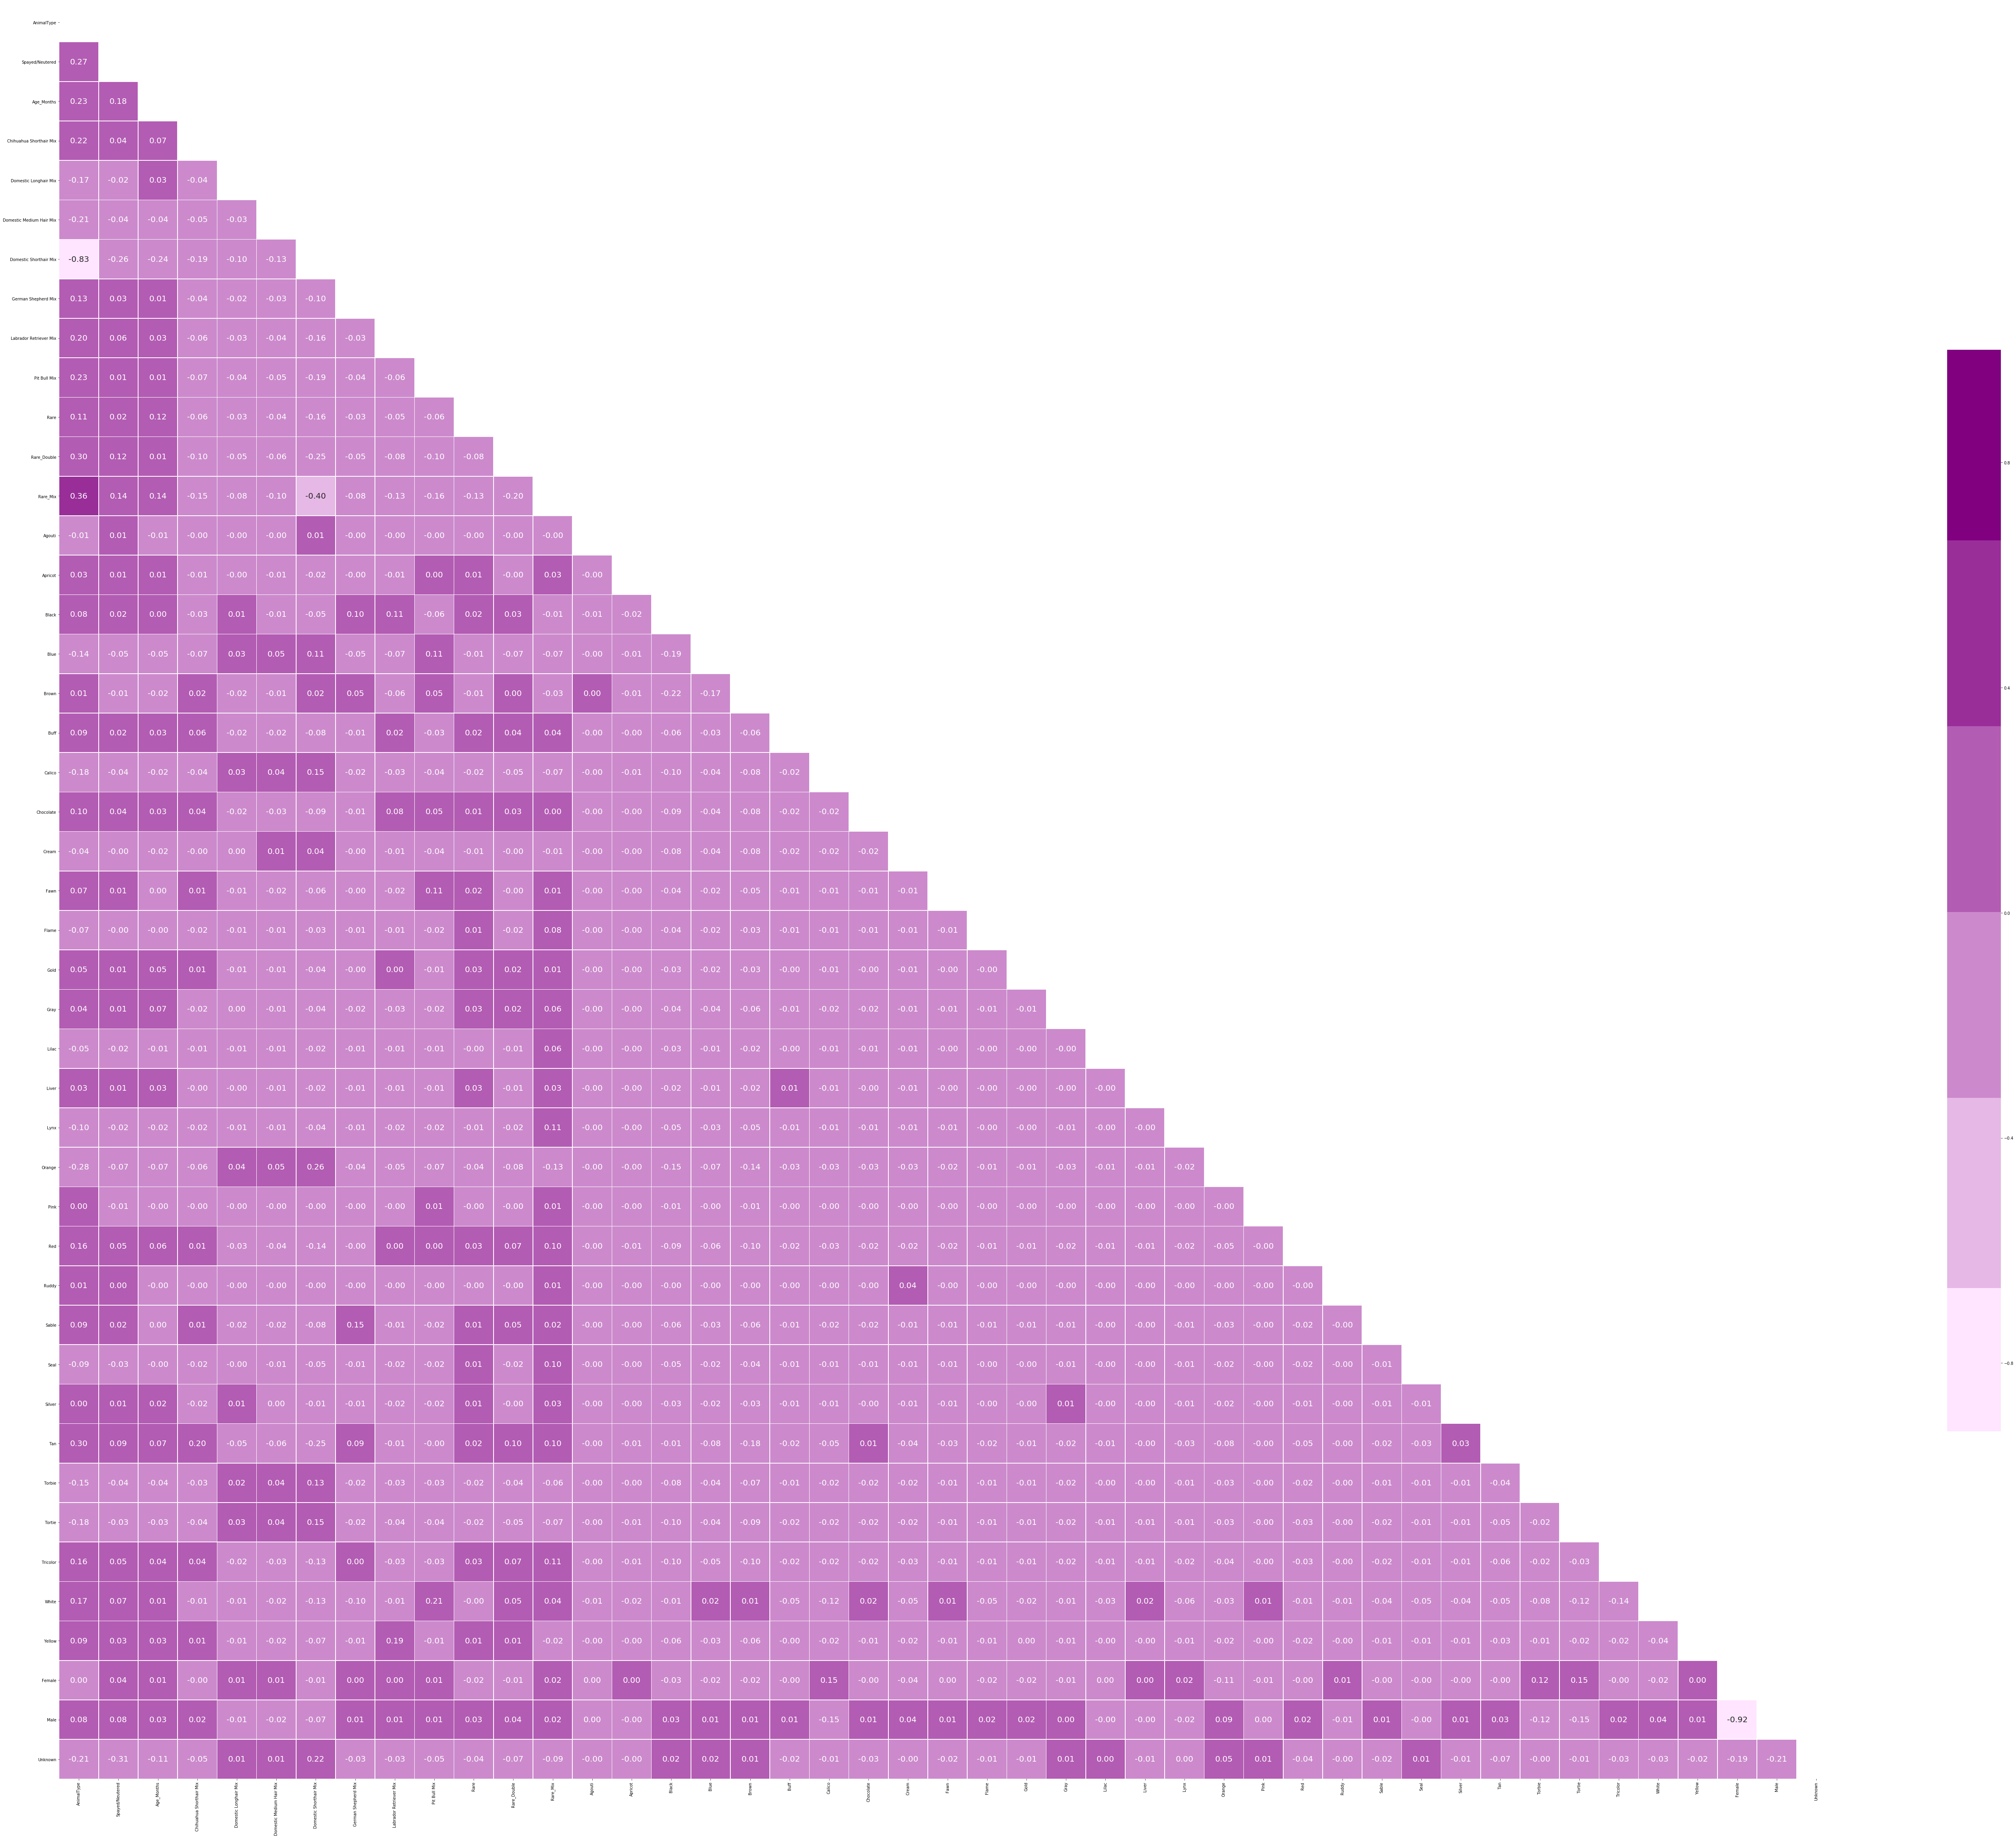

In [259]:
## Heat map for the corrleation -- its realy big

f, ax = plt.subplots(figsize=(100, 100))

mask = np.triu(np.ones_like(correlation_no_targ, dtype=np.bool)) # can remove this to have the full matrix

cmap = sns.light_palette("purple", reverse = False)

sns.heatmap(correlation_no_targ, mask=mask, annot = True,  annot_kws={"size": 20}, fmt='.2f', cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)

plt.show()

In [260]:
"""
We don't have hight Collinearity between collumns - good. But also we don't have big correlation between features and the 
the feature (outcome type) that we want to predict - bad """

"\nWe don't have hight Collinearity between collumns - good. But also we don't have big correlation between features and the \nthe feature (outcome type) that we want to predict - bad "

In [261]:
## Cant see anything whit this 
#sns.pairplot(shel)

# Modeling

In [262]:
"""
Its a Supervised ML problem because we know what is our targer y = ('OutcomeType'). Model 

"""

"\nIts a Supervised ML problem because we know what is our targer y = ('OutcomeType'). Model \n\n"

In [263]:
# X is the features 

X = shel.drop(columns = 'OutcomeType')

# y is the outcome we want to predict 
y = shel['OutcomeType']



In [264]:
X.columns

Index(['AnimalType', 'Spayed/Neutered', 'Age_Months',
       'Chihuahua Shorthair Mix', 'Domestic Longhair Mix',
       'Domestic Medium Hair Mix', 'Domestic Shorthair Mix',
       'German Shepherd Mix', 'Labrador Retriever Mix', 'Pit Bull Mix', 'Rare',
       'Rare_Double', 'Rare_Mix', 'Agouti', 'Apricot', 'Black', 'Blue',
       'Brown', 'Buff', 'Calico', 'Chocolate', 'Cream', 'Fawn', 'Flame',
       'Gold', 'Gray', 'Lilac', 'Liver', 'Lynx', 'Orange', 'Pink', 'Red',
       'Ruddy', 'Sable', 'Seal', 'Silver', 'Tan', 'Torbie', 'Tortie',
       'Tricolor', 'White', 'Yellow', 'Female', 'Male', 'Unknown'],
      dtype='object')

In [265]:
X.head()

,AnimalType,Spayed/Neutered,Age_Months,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,Pit Bull Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
0,1,1,12.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,12.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,24.00,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0.69,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,24.00,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Scaling

In [266]:

# 1 - Standarize features 1st with StandardScaler()

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [267]:
# 2 - Standarize features 2snt with MinMaxScaler(feature_range=(-x,x))


scaler = MinMaxScaler(feature_range=(-2,2))

X_std = scaler.fit_transform(X)

In [268]:
# Vizualise what The scaler do to my data 

scaled_df = pd.DataFrame(X_std, columns = [X.columns])
scaled_df.head()

,AnimalType,Spayed/Neutered,Age_Months,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,Pit Bull Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
0,2.0,2.0,-1.8000,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,-2.0,-2.0,2.0,-2.0
1,-2.0,2.0,-1.8000,-2.0,-2.0,-2.0,2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2.0,-2.0,-2.0
2,2.0,2.0,-1.6000,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,-2.0,-2.0,2.0,-2.0
3,-2.0,-2.0,-1.9885,-2.0,-2.0,-2.0,2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2.0,-2.0
4,2.0,2.0,-1.6000,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-2.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2.0,-2.0


In [269]:
# Split Data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=29)


# SMOTE

In [240]:
# balance the Train data - not working for now  # SMOTE BY TRISTAN 

from imblearn.over_sampling import SMOTE

import numpy as np

sm = SMOTE(random_state=67)

x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print (y_train.value_counts() , np.bincount(y_train_res))

0    8657
3    7539
2    3767
1    1405
Name: OutcomeType, dtype: int64 [8657 8657 8657 8657]


In [270]:
lr = LogisticRegression() ## initialization of the object from a class - in this case we initiaze a logistic regression model

lr.fit(X_train,y_train) 

acc = lr.score(X_test,y_test)*100  

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")
print(lr.predict(X_test[: 1])) # prediction
print(y_test[: 1])

/Users/Shiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Shiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Test Accuracy 63.67%
[0]
14480    0
Name: OutcomeType, dtype: int64


In [271]:
lr.predict(X_test)

array([0, 2, 3, ..., 0, 0, 0])

In [272]:
np.array(scaled_df.iloc[4])

array([ 2. ,  2. , -1.6, -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
        2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -2. , -2. ,  0. , -2. , -2. , -2. , -2. , -2. , -2. ,  2. ,
       -2. ])

In [273]:
# Function

def outcome(out):
    """
    This function returns the oucome of the animal based on the algorithm
    
    Input: prediction as Encoded Label from the prediction
    
    Output: The real Outcome as a categorical
    """

    dic = {0 : 'Adopted', 3: ' Be Transfered', 2:'Return To Owner', 1:'Die'}
    
    
    return dic[int(out)]


example = lr.predict(np.array(scaled_df.iloc[5]).reshape(1,-1))
example2 = y.iloc[5]

print( f'The prediction is that the animal will {outcome(example)}') 
print( f'In Reality the animal will {outcome(example2)}') 



The prediction is that the animal will  Be Transfered
In Reality the animal will  Be Transfered


# Make a Graph for Visusualize the Reality vs The Prediction (OUTCOME)

In [274]:
### The True Outcome values - viz 1' ###

# Percentage of outcome numerical
num_out_perc_real = y_test.value_counts()/y_test.value_counts().sum()

#Rename index for outcome in categorical 

num_out_perc_real.index = ['Adoption', 'Transfer', 'Return_to_owner', 'Died' ]

num_out_perc_real


Adoption           0.395358
Transfer           0.349495
Return_to_owner    0.190565
Died               0.064583
Name: OutcomeType, dtype: float64

In [275]:
num_out_pred = pd.Series(lr.predict(X_test))
num_out_pred


0       0
1       2
2       3
3       0
4       0
       ..
5337    3
5338    0
5339    0
5340    0
5341    0
Length: 5342, dtype: int64

In [276]:
### The Predicted Outcome values - viz 2' ###


# Percentage of outcome numerical
num_out_perc_pred = num_out_pred.value_counts()/num_out_pred.value_counts().sum()

#Rename index for outcome in categorical 

num_out_perc_pred.index = ['Adoption', 'Transfer', 'Return_to_owner', 'Died' ]

num_out_perc_pred

Adoption           0.584800
Transfer           0.306627
Return_to_owner    0.104830
Died               0.003744
dtype: float64

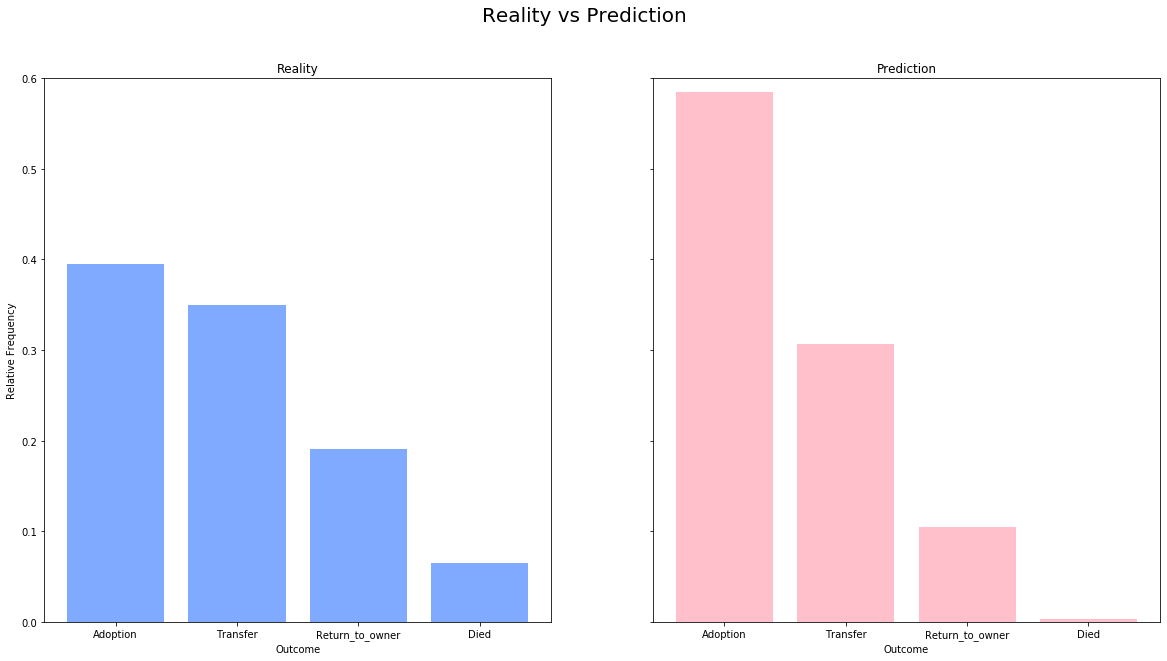

In [277]:
# Prediction Vs 

fig, axs = plt.subplots(1, 2, figsize=(20, 10))


axs[0].bar(num_out_perc_real.index ,num_out_perc_real , color = '#80aaff')
axs[0].set_ylim(0,0.6)
axs[0].set_title('Reality')
axs[1].bar(num_out_perc_pred.index ,num_out_perc_pred , color = 'pink')
axs[1].set_ylim(0,0.6)
axs[1].set_title('Prediction')

fig.suptitle('Reality vs Prediction', fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='Outcome', ylabel='Relative Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

#plt.savefig('RealxPredNOSMOTE2.png', bbox_inches='tight' , dpi = 300) # for saving


plt.show()

In [216]:
# Evaluation For LogisticRegression: 

Without SMOTE

accuracy: 0.636652938974167
    
    precision: [0.61107554 0.4        0.50714286 0.73260073]
        
        recall: [0.90388258 0.02318841 0.27897839 0.64274237] 
            
            F1: [0.72918258 0.04383562 0.3599493  0.68473609]

With SMOTE 

accuracy: 0.5941594908274055
    
    precision: [0.67337329 0.21256039 0.4263245  0.81053526]
        
         recall: [0.74479167 0.51098018 0.50589391 0.3826087] 
            
            F1: [0.70728417 0.27329193 0.46271339 0.62680683]

In [218]:
#Prediction
y_pred = lr.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test,y_pred, labels = [0,3,2,1])
# Accuracy
acc = accuracy_score(y_test, y_pred)
#Precision (true positive / true positive + false positive)
pr = precision_score(y_test, y_pred , average = None, labels = [0,3,2,1])
#recal ( True positive / Tre positive + False Negative)
rc = recall_score(y_test, y_pred , average = None, labels = [0,3,2,1])
# F1 score (2 * True Positive / 2* Ture Positive + False Positive + False Negative)
f1 = f1_score(y_test, y_pred , average = None, labels = [0,3,2,1])


print('accuracy:', acc, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.5941594908274055 precision: [0.67337329 0.81053526 0.4263245  0.21256039] recall: [0.74479167 0.51098018 0.50589391 0.3826087 ] F1: [0.70728417 0.62680683 0.46271339 0.27329193]


In [32]:
cm

array([[1909,   61,  140,    2],
       [ 579, 1200,   85,    3],
       [ 572,  155,  284,    7],
       [  64,  222,   51,    8]])

In [33]:

tn, fp, fn, tp = confusion_matrix(y_test,y_pred,labels = [0,3,2,1])

tn, fp, fn, tp

(array([1909,   61,  140,    2]),
 array([ 579, 1200,   85,    3]),
 array([572, 155, 284,   7]),
 array([ 64, 222,  51,   8]))

In [34]:
multilabel_confusion_matrix(y_test, y_pred, labels= [0,3,2,1])

array([[[2015, 1215],
        [ 203, 1909]],

       [[3037,  438],
        [ 667, 1200]],

       [[4048,  276],
        [ 734,  284]],

       [[4985,   12],
        [ 337,    8]]])

In [35]:
## Visualy check the predictions on the test and the actual value of the test target variable

print(y_pred[:10])
print(np.array(y_test[:10]))

[0 2 3 0 0 0 3 2 2 3]
[0 2 1 0 3 0 3 2 1 3]


In [36]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(f"5 neighbors KNN Score: {round(acc,5)}%")

5 neighbors KNN Score: 59.77162%


In [37]:
# Decision Tree Model

dtc = DecisionTreeClassifier() ## Create the Model - Decision Tree

dtc.fit(X_train, y_train) ## Fit into the Model the train dataset 

y_pred = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100

print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
print(dtc.predict(X_test[ : 1]))
print(y_test[: 1])

Decision Tree Test Accuracy 59.77%
[0]
14480    0
Name: OutcomeType, dtype: int64


In [38]:
#Suport Vector Machine

svm = SVC()
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

/Users/Shiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Algorithm Test Accuracy 63.59%


In [39]:
from sklearn.model_selection import cross_validate , cross_val_score

In [40]:
## Cross validate 5 times to se if there is a particular section of the training features that have less impact on
## the prediction 
cross_validate(svm, X_train, y_train, cv = 5)

/Users/Shiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Shiva/opt/anaconda3/lib/python3.7/si

{'fit_time': array([43.63335896, 37.55893207, 38.3996489 , 37.72234488, 33.63839889]),
 'score_time': array([3.84339309, 3.44480991, 4.95411515, 3.4693861 , 3.55047989]),
 'test_score': array([0.6194152 , 0.62479532, 0.62485373, 0.63187456, 0.62827715])}

# Dimension Reduction - PCA


To-Do before modelling:
Dimensionality Reduction (PCA) (to have less columns, remove redundant columns)
Feature Selection/Engineering (choosing the most important columns)





Classification algorithms (Python)